# K-Nearest Neighbors Algorithm in Python and Scikit-Learn

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

In this article, we will see how KNN can be implemented with Python's Scikit-Learn library. But before that let's first explore the theory behind KNN and see what are some of the pros and cons of the algorithm.

# Main Concept of the K-Nearest Neighbors
The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

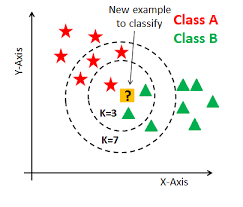

# Pros and Cons of KNN
In this section we'll present some of the pros and cons of using the KNN algorithm.

# Pros 
It is extremely easy to implement
As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
Since the algorithm requires no training before making predictions, new data can be added seamlessly.
There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)
Cons
The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

# Implementing KNN Algorithm with Scikit-Learn

In this section, we will see how Python's Scikit-Learn library can be used to implement the KNN algorithm in less than 20 lines of code. The download and installation instructions for Scikit learn library are available at here[https://archive.ics.uci.edu/ml/datasets/Iris]

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

# Feature Scaling
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [7]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

In [8]:
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



The results show that our KNN algorithm was able to classify all the 30 records in the test set with 93% accuracy, which is excellent. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

# Comparing Error Rate with the K Value
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

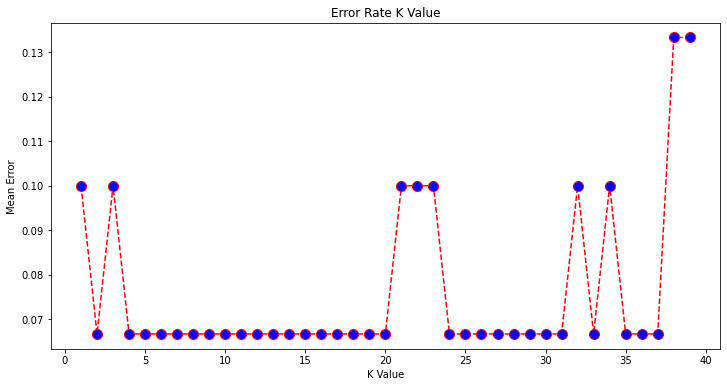

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Conclusion
KNN is a simple yet powerful classification algorithm. It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm. The KNN algorithm have been widely used to find document similarity and pattern recognition. It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps for computer vision, particularly face recognition tasks.